In [57]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving private leaderboard.PNG to private leaderboard.PNG
Saving azote-croissance-174218.jpg to azote-croissance-174218.jpg


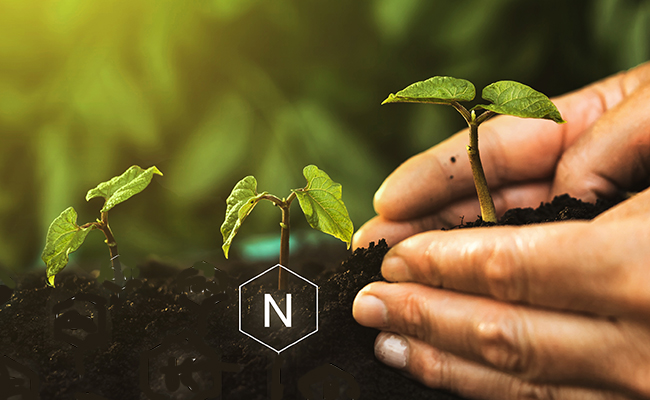

In [58]:
Image('azote-croissance-174218.jpg')

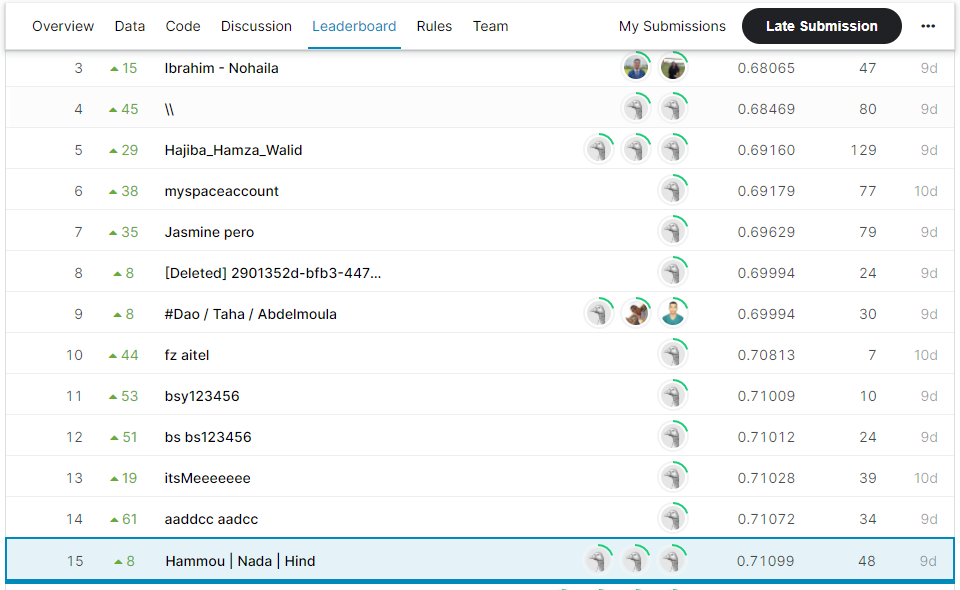

In [59]:
Image('private leaderboard.PNG')

# Importing librairies

In [2]:
#import some necessary librairies
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import load_boston

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing data

NB: the datasets i uploaded are already corrected; I've already convert the files type to xlsx and I've replaced the , with . and - with Nan...

In [4]:
#Now let's import and put the train and test datasets in  pandas dataframe
df = pd.read_excel('/content/drive/MyDrive/data.xlsx')
dft = pd.read_excel('/content/drive/MyDrive/test.xlsx')

In [6]:
#display the first five rows of the train dataset.
df.head()

,id,Province,Agroecological.zones,Crop,Grp.Crop,Regime,Code_Stage,birth.day,sampling.date,Base.Feed,Second.feed.1,second.feed.1.date,second.feed..2,second.feed..2.date,Sampling.Timing.Vs.second.feed.timing,Target,Mos.,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,IND1,IND2,IND3,IND4,IND5,IND6,IND7,IND8,IND9,B1,...,FAPARsum,Fpar_Diff,Fpar_fev,Fpar_jan,Fpar_mars,Fpar_max,Fpar_min,LAI_Diff,LAI_fev,LAI_jan,LAI_jan_mars,LAI_mars,LAI_max,LAI_min,LAI_oct_dec,LAI_oct_mars,LAIsum,LST_DAY_jan_mars,LST_DAY_oct_dec,LST_Night_jan_mars,LST_Night_oct_dec,NDVI_Diff,NDVI_RUE,NDVI_fev,NDVI_jan,NDVI_jan_mars,NDVI_mars,NDVI_max,NDVI_min,NDVI_oct_dec,NDVI_oct_mars,NDVIsum,P_dec_fev,P_oct_mars,P_sep_nov,pH,Ec,MO,K20,P2O5
0,1,EL YOUSSOUFIA,défavorable,Orge,Barley,Bour,S1,2020-12-15,2021-02-10,Yes,Yes,2021-01-25,No,NaT,After,5.11,0.97,0.159,0.001,0.251,0.147,0.122,0.121,0.102,0.148,0.306,0.362,0.347,0.381,0.132,0.536,0.002,3.871,0.482,0.628,829.472,832.163,0.413,2.789,708.40,...,7.00,0.20,0.26,0.40,0.17,0.32,0.13,0.12,0.35,0.52,0.35,0.23,0.35,0.23,0.35,0.35,9.66,31.83,26.74,8.38,10.36,-0.18,2.24,0.32,0.48,0.32,0.24,0.36,0.18,0.40,0.36,4.14,48.08,212.35,145.85,10.2,0.4,4.1,529.0,155.4
1,2,EL YOUSSOUFIA,défavorable,Blé dur,Wheat,Bour,S1,2020-12-01,2021-02-10,No,No,NaT,No,NaT,No N topDress,3.81,0.95,0.170,0.002,0.264,0.173,0.123,0.118,0.113,0.164,0.320,0.374,0.352,0.399,0.119,0.510,0.002,3.528,0.449,0.592,828.348,831.180,0.397,3.258,671.43,...,4.15,0.14,0.16,0.22,0.17,0.22,0.08,0.12,0.23,0.23,0.23,0.23,0.23,0.12,0.23,0.23,5.52,34.35,30.37,10.26,12.55,-0.04,1.40,0.21,0.26,0.21,0.18,0.22,0.18,0.26,0.22,2.51,37.99,206.52,161.54,10.0,0.3,3.0,172.5,57.6
2,3,EL YOUSSOUFIA,défavorable,Blé tendre,Wheat,Bour,S1,2020-12-20,2021-02-10,No,No,NaT,No,NaT,No N topDress,4.06,0.95,0.180,0.002,0.283,0.150,0.127,0.132,0.096,0.165,0.452,0.540,0.529,0.573,0.169,1.213,0.004,4.754,0.611,0.797,829.471,832.162,0.622,3.371,515.27,...,8.20,0.14,0.23,0.39,0.17,0.29,0.15,0.12,0.35,0.46,0.35,0.23,0.35,0.23,0.81,0.46,12.08,32.34,27.01,8.82,10.59,-0.09,2.44,0.28,0.35,0.28,0.22,0.29,0.20,0.56,0.36,4.51,48.08,212.35,145.85,10.0,0.3,2.4,190.9,51.3
3,4,EL YOUSSOUFIA,défavorable,Orge,Barley,Bour,S1,2020-12-15,2021-02-10,Yes,Yes,2021-01-20,No,NaT,After,5.30,0.99,0.155,0.002,0.272,0.173,0.127,0.128,0.125,0.166,0.284,0.323,0.314,0.345,0.122,0.339,0.001,3.260,0.368,0.497,827.407,830.356,0.323,2.734,773.67,...,6.79,0.14,0.20,0.39,0.16,0.28,0.14,0.23,0.29,0.52,0.29,0.23,0.46,0.23,0.35,0.35,9.55,31.72,26.30,8.33,10.13,-0.14,2.21,0.30,0.45,0.30,0.23,0.33,0.19,0.46,0.33,4.09,48.08,212.35,145.85,10.1,0.2,2.3,361.1,57.2
4,6,El Jadida,interemédiaire,Orge,Barley,Bour,S1,2020-11-20,2021-01-27,No,No,NaT,No,NaT,No N topDress,3.62,1.00,0.149,0.001,0.159,0.061,0.106,0.099,0.046,0.101,0.411,0.559,0.526,0.591,0.118,2.088,0.003,6.430,0.798,0.966,834.889,836.903,0.722,2.844,359.95,...,14.17,0.75,0.78,0.72,0.64,0.91,0.16,2.07,2.19,1.44,1.67,1.61,2.30,0.23,1.04,1.50,30.82,26.85,24.16,9.84,12.48,-0.53,2.79,0.70,0.74,0.72,0.69,0.80,0.27,0.50,0.68,6.78,80.18,279.22,175.48,9.8,0.3,0.9,268.1,137.8


In [7]:
#display the first five rows of the test dataset.
dft.head()

,id,Province,Agroecological.zones,Crop,Grp.Crop,Regime,Code_Stage,birth.day,sampling.date,Base.Feed,Second.feed.1,second.feed.1.date,second.feed..2,second.feed..2.date,Sampling.Timing.Vs.second.feed.timing,Mos.,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,IND1,IND2,IND3,IND4,IND5,IND6,IND7,IND8,IND9,B1,B2,...,FAPARsum,Fpar_Diff,Fpar_fev,Fpar_jan,Fpar_mars,Fpar_max,Fpar_min,LAI_Diff,LAI_fev,LAI_jan,LAI_jan_mars,LAI_mars,LAI_max,LAI_min,LAI_oct_dec,LAI_oct_mars,LAIsum,LST_DAY_jan_mars,LST_DAY_oct_dec,LST_Night_jan_mars,LST_Night_oct_dec,NDVI_Diff,NDVI_RUE,NDVI_fev,NDVI_jan,NDVI_jan_mars,NDVI_mars,NDVI_max,NDVI_min,NDVI_oct_dec,NDVI_oct_mars,NDVIsum,P_dec_fev,P_oct_mars,P_sep_nov,pH,Ec,MO,K20,P2O5
0,5,EL YOUSSOUFIA,défavorable,Blé tendre,Wheat,Bour,S1,2020-12-20,2021-02-10,No,No,NaT,No,NaT,No N topDress,0.96,0.256,0.002,0.373,0.289,0.234,0.232,0.228,0.275,0.396,0.446,0.438,0.469,0.158,0.314,0.002,2.901,0.272,0.364,828.310,831.147,0.293,2.127,585.35,924.60,...,7.59,0.15,0.28,0.40,0.22,0.30,0.15,0.23,0.46,0.58,0.46,0.35,0.46,0.23,0.46,0.46,11.39,33.56,27.84,8.75,11.63,-0.09,2.25,0.34,0.41,0.34,0.30,0.37,0.27,0.51,0.37,4.35,48.25,221.88,160.23,10.5,0.3,1.2,103.5,38.1
1,11,Safi,défavorable,Orge,Barley,Bour,S1,2020-11-13,2021-02-11,No,No,NaT,No,NaT,No N topDress,0.90,0.144,0.001,0.192,0.094,0.113,0.108,0.078,0.130,0.340,0.423,0.407,0.458,0.127,0.901,0.002,4.604,0.609,0.781,831.382,833.835,0.536,3.114,504.97,811.09,...,10.21,0.37,0.45,0.55,0.37,0.53,0.16,0.58,0.81,0.81,0.81,0.69,0.81,0.23,0.69,0.81,16.44,28.85,25.27,11.22,13.51,-0.24,2.22,0.48,0.52,0.46,0.40,0.49,0.25,0.51,0.46,5.07,53.43,262.96,197.00,9.9,0.2,1.9,472.7,5.8
2,16,Safi,défavorable,Orge,Barley,irrigué,S1,2020-11-16,2021-02-11,Yes,Yes,2021-02-01,No,NaT,After,0.81,0.151,0.001,0.185,0.090,0.107,0.100,0.058,0.113,0.359,0.470,0.461,0.520,0.096,1.308,0.002,5.166,0.704,0.891,833.232,835.453,0.634,3.069,442.03,867.55,...,10.95,0.36,0.54,0.58,0.39,0.59,0.23,0.81,1.04,0.86,0.81,0.69,1.15,0.35,0.81,0.81,17.83,30.58,26.83,10.42,12.43,-0.18,2.46,0.50,0.53,0.50,0.41,0.50,0.32,0.53,0.50,5.35,51.35,250.64,187.00,9.9,0.6,3.5,306.4,648.6
3,20,Safi,défavorable,Orge,Barley,Bour,S1,2020-11-05,2021-02-11,No,No,NaT,No,NaT,No N topDress,0.97,0.157,0.001,0.327,0.227,0.133,0.126,0.153,0.174,0.254,0.289,0.266,0.323,0.088,0.200,0.000,4.281,0.286,0.312,831.844,834.238,0.197,2.922,NaN,NaN,...,8.77,0.26,0.39,0.53,0.31,0.41,0.15,0.46,0.58,0.81,0.58,0.52,0.69,0.23,0.46,0.58,13.23,31.38,26.35,11.33,11.70,-0.28,2.21,0.49,0.60,0.49,0.40,0.51,0.23,0.46,0.48,5.17,55.90,268.46,199.49,9.9,0.3,3.6,197.2,1587.0
4,24,El Jadida,interemédiaire,Blé dur,Wheat,Bour,S1,2020-11-28,2021-01-26,Yes,Yes,2020-11-28,No,NaT,After,0.93,0.149,0.001,0.218,0.132,0.122,0.122,0.093,0.138,0.271,0.320,0.322,0.347,0.073,0.446,0.002,3.450,0.458,0.632,828.845,831.614,0.398,2.325,432.62,839.82,...,14.86,0.64,0.76,0.76,0.56,0.86,0.22,1.61,1.78,1.50,1.50,1.21,1.96,0.35,0.92,1.50,31.40,25.09,24.99,10.25,12.41,-0.45,2.83,0.81,0.81,0.81,0.58,0.82,0.37,0.75,0.81,7.95,106.34,323.46,214.48,9.8,0.2,3.0,163.1,77.6


In [9]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df.shape))
print("The test data size before dropping Id feature is : {} ".format(dft.shape))

#Save the 'Id' column
train_ID = df['id']
test_ID = dft['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df.drop("id", axis = 1, inplace = True)
dft.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(dft.shape))

The train data size before dropping Id feature is : (2096, 110) 
The test data size before dropping Id feature is : (238, 109) 

The train data size after dropping Id feature is : (2096, 109) 
The test data size after dropping Id feature is : (238, 108) 


# Data Processing

**correcting Data**


In [12]:
df['Crop'].unique()

array(['Orge', 'Blé dur', 'Blé tendre', 'ORGE ', 'ORGE', 'orge ', 'orge',
       'Avoine', 'Orge ', 'Blé Tendre', 'Blé dur ', 'blé tendre',
       'Blé tendre ', 'blé tendre '], dtype=object)

as we can see above here there are some categorical features that contain duplicate categories due to the spaces between words or as we can see there is some categories that are the same but not written in the same way

In [13]:
#so let's fix the space and capitalization problems first
for i in df.select_dtypes(include='object'):
    df[i]=df[i].str.lower()
    df[i]=df[i].str.strip()
    dft[i]=dft[i].str.lower()
    dft[i]=dft[i].str.strip()

In [14]:
df['Crop'].unique()

array(['orge', 'blé dur', 'blé tendre', 'avoine'], dtype=object)

now it's better 😊

 **visualizing the dependent variable**

Target is the variable we need to predict. So let's do some analysis on this variable first.

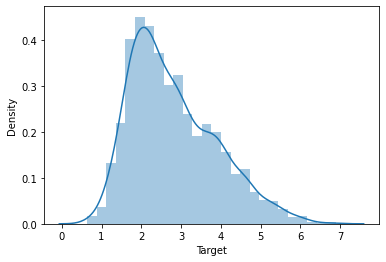

In [15]:
#histogram

sns.distplot(df['Target'])

In [16]:
#skewness and kurtosis
print("Skewness: %f" % df['Target'].skew())
print("Kurtosis: %f" % df['Target'].kurt())

Skewness: 0.726346
Kurtosis: 0.014016


**Relationship with numerical variables**

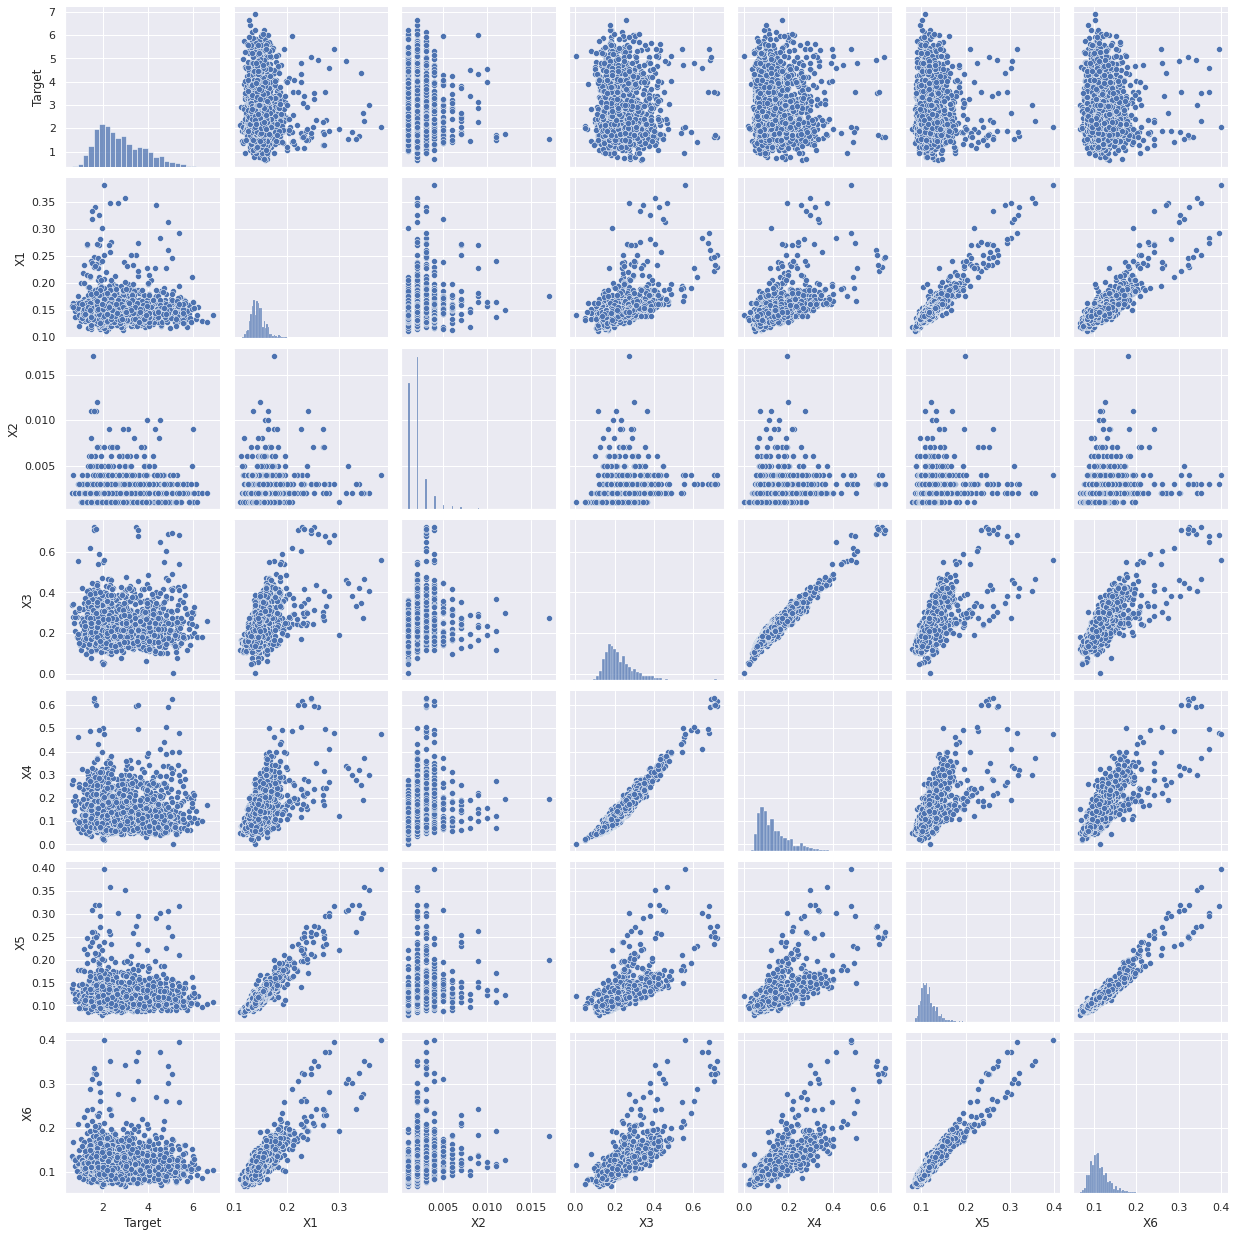

In [17]:
#scatterplot
sns.set()
cols = ['Target', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']
sns.pairplot(df[cols], size = 2.5)
plt.show();

**Relationship with categorical features**

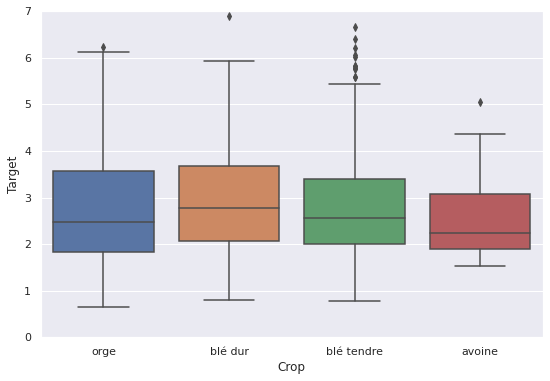

In [18]:
#box plot overallqual/saleprice
var = 'Crop'
data = pd.concat([df['Target'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="Target", data=data)
fig.axis(ymin=0, ymax=7);

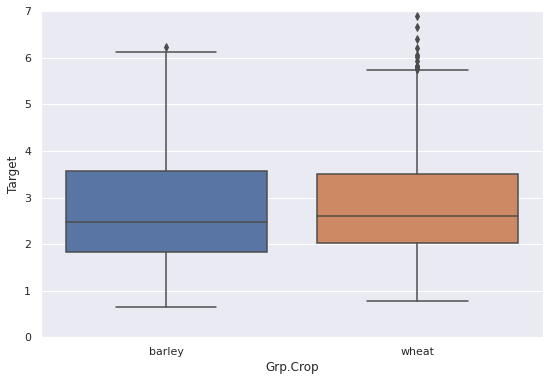

In [19]:
#box plot overallqual/saleprice
var = 'Grp.Crop'
data = pd.concat([df['Target'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="Target", data=data)
fig.axis(ymin=0, ymax=7);

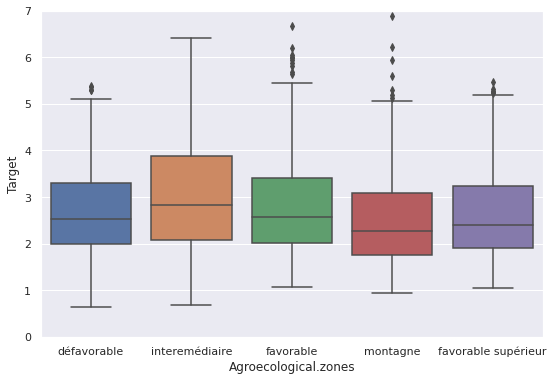

In [20]:
#box plot overallqual/saleprice
var = 'Agroecological.zones'
data = pd.concat([df['Target'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="Target", data=data)
fig.axis(ymin=0, ymax=7);

**Target variable analysis**

checking for target variable normality (and enforcing normality through a transform) is helpful in developing accurate regression models
So let's take a look at the Sale Price data and check for normality, and try to correct it otherwise...

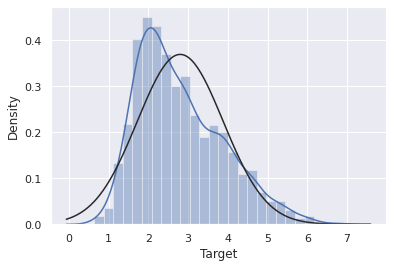

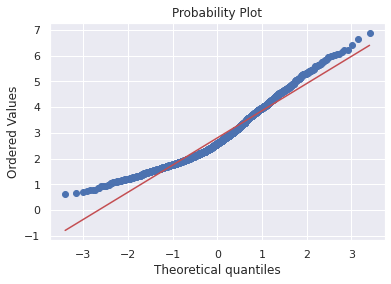

In [21]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(df['Target'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['Target'], plot=plt)

So, certainly not normal: we have right-skewness and the data is a bit peak-y. Let's apply a log1p transformation on the Target and see what happens...

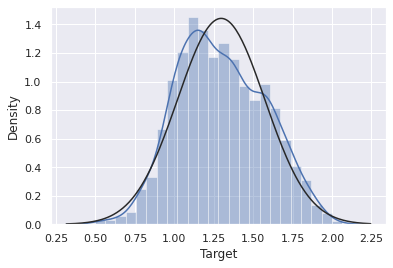

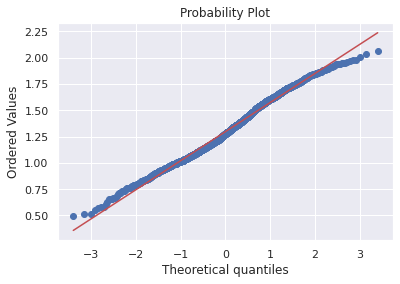

In [22]:
df['Target'] = np.log1p(df["Target"])
sns.distplot(df['Target'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['Target'], plot=plt)

cool it looks more better 🤙 The skew seems now corrected and the data appears more normally distributed.
<br>we applied too many other transformations like boxcox, exp, log... but these transformation above gives us the best results

**Features engineering**

**Missing data**

In [23]:
#missing data train
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
second.feed..2.date,2080,0.992366
Ec,1200,0.572519
P2O5,1198,0.571565
MO,1198,0.571565
pH,1198,0.571565
K20,1198,0.571565
Regime,1118,0.533397
second.feed.1.date,864,0.412214
B4,526,0.250954
B6,526,0.250954


Text(0.5, 1.0, 'Percent missing data by feature')

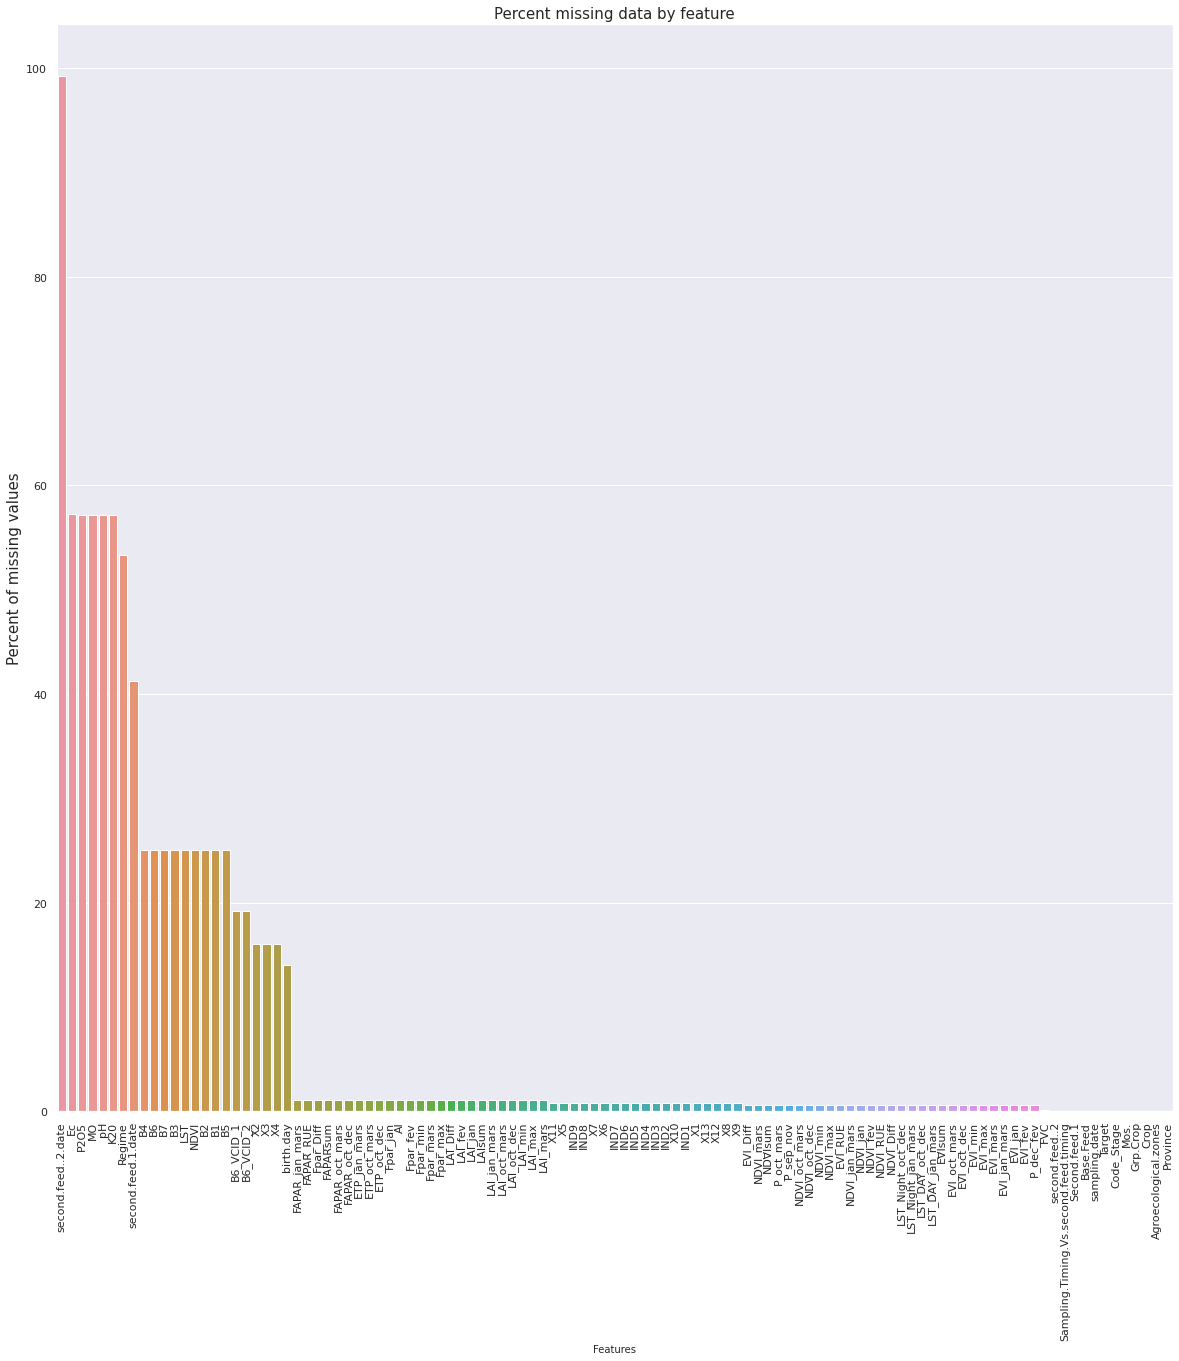

In [27]:
f, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=percent*100)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [29]:
#missing data in the test dataset
totalt = dft.isnull().sum().sort_values(ascending=False)
percentt = (dft.isnull().sum()/dft.isnull().count()).sort_values(ascending=False)
missing_datat = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_datat.head(10)

,Total,Percent
second.feed..2.date,2080,0.992366
Ec,1200,0.572519
P2O5,1198,0.571565
MO,1198,0.571565
pH,1198,0.571565
K20,1198,0.571565
Regime,1118,0.533397
second.feed.1.date,864,0.412214
B4,526,0.250954
B6,526,0.250954


Text(0.5, 1.0, 'Percent missing data by feature')

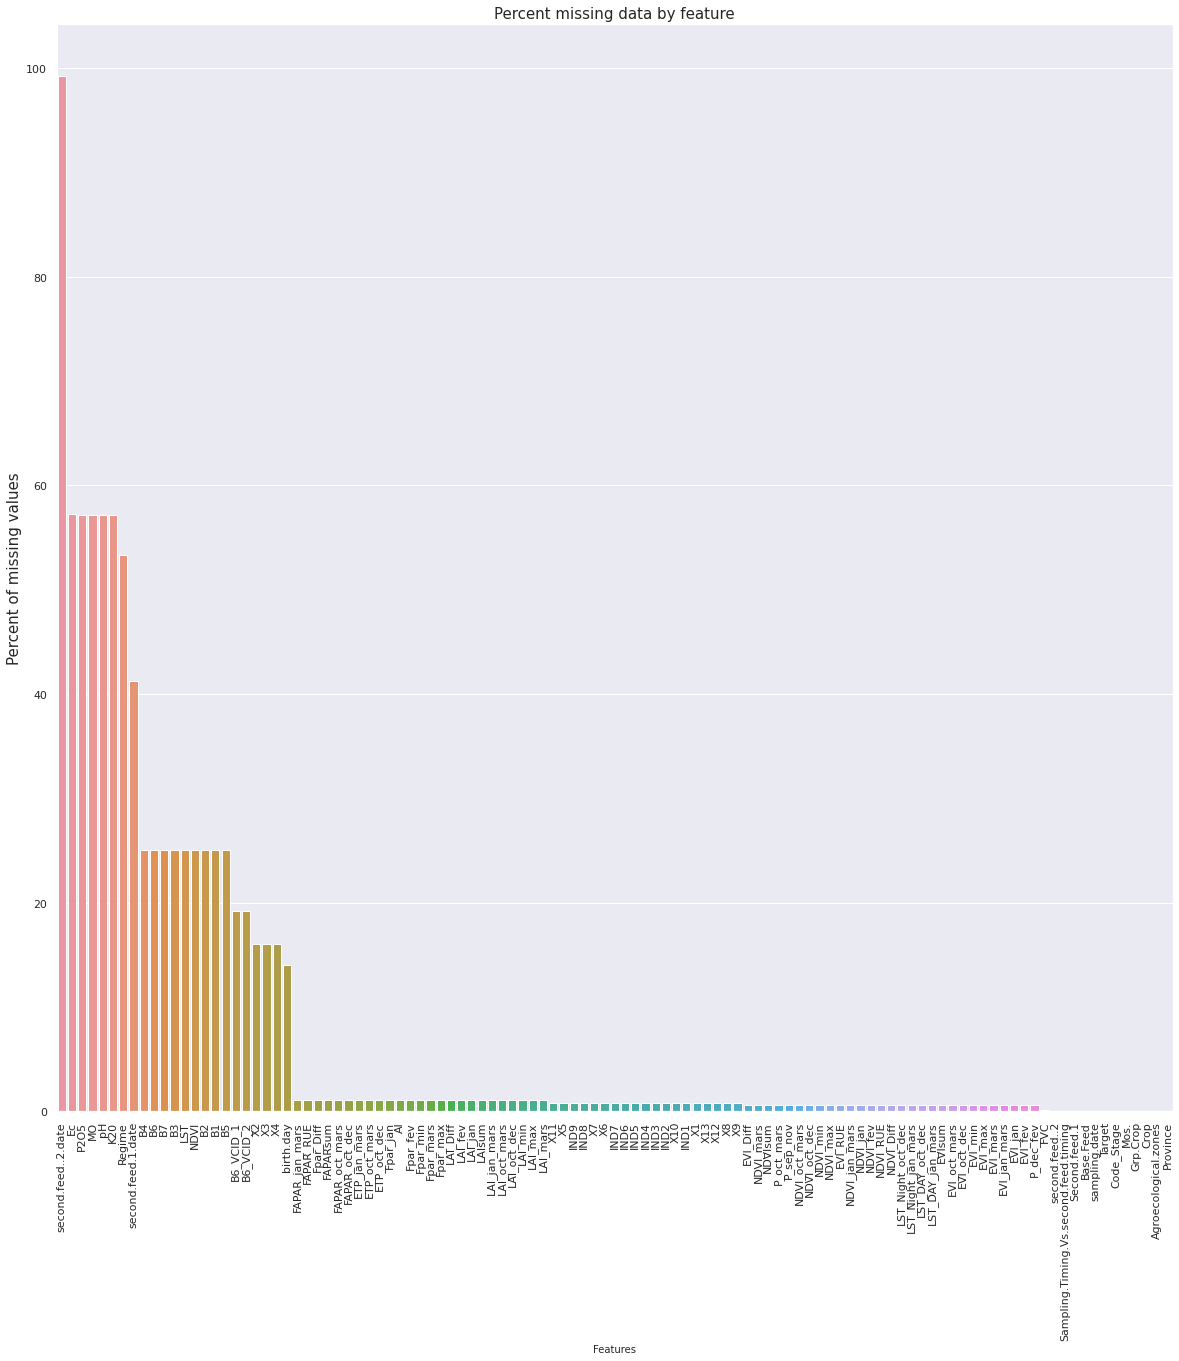

In [30]:
f, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation='90')
sns.barplot(x=missing_datat.index, y=percent*100)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

It looks like we have too many missing values, let's drop some 🥰

In [31]:
#creating a list of features with more than 0.57 in the percent of missing values
def listcol(dff):
    l=[]
    for col in dff.columns:
        if (dff[col].isna().sum()/len(dff[col])> 0.57)  :
            l.append(col)
    return l
print(len(listcol(df)))
print(len(listcol(dft)))

6
6


In [32]:
listcol(df)

['second.feed..2.date', 'pH', 'Ec', 'MO', 'K20', 'P2O5']

In [33]:
listcol(dft)

['second.feed..2.date', 'pH', 'Ec', 'MO', 'K20', 'P2O5']

In [34]:
#dropping these features
df = df.drop(columns=listcol(df))
dft = dft.drop(columns=listcol(dft))

**Data Correlation**


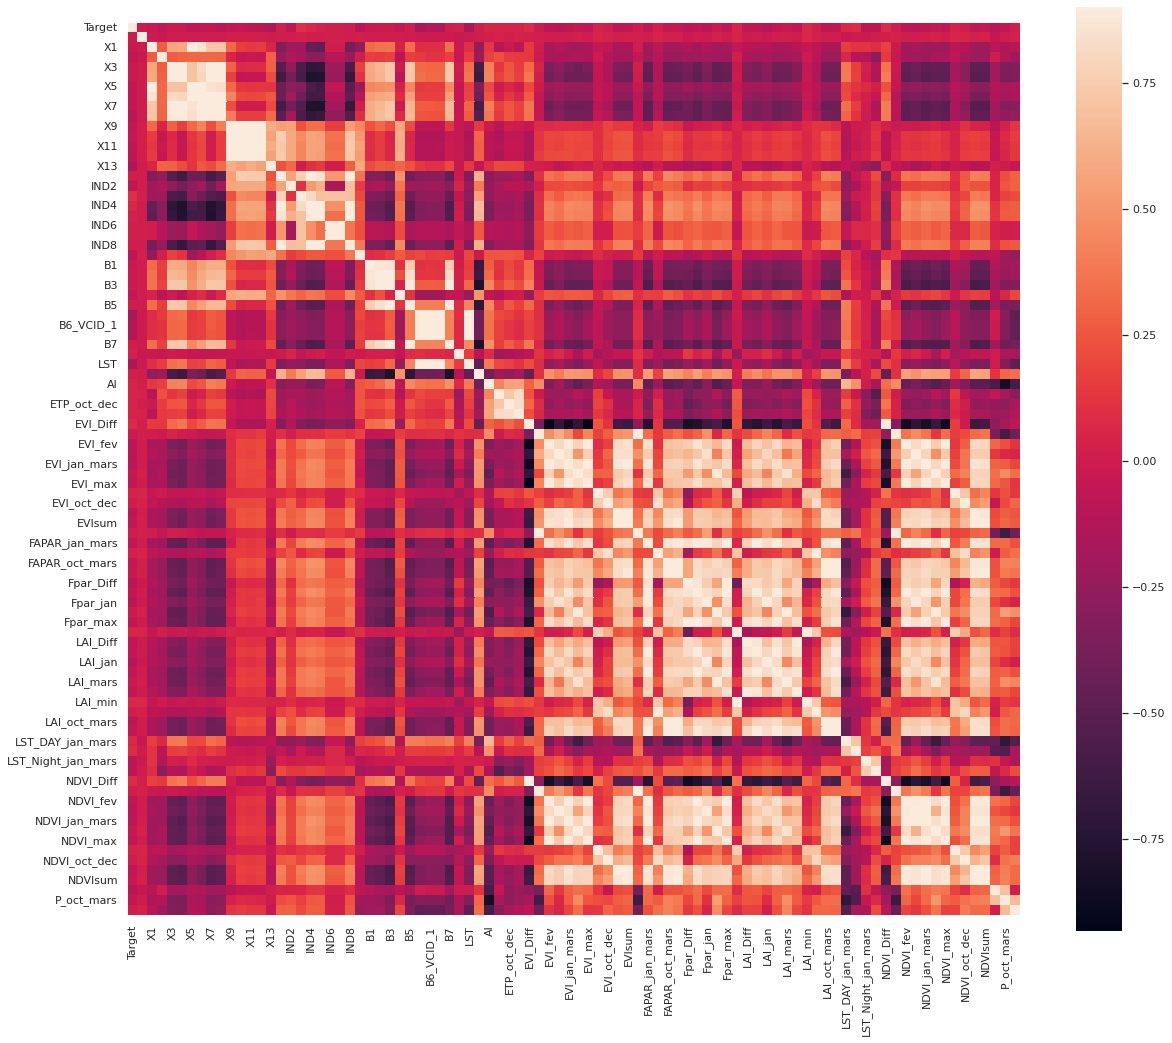

In [35]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(20,17))
sns.heatmap(corrmat, vmax=0.9, square=True)

it looks like we have high correlated features. let's drop them

In [36]:
corr = df.corr().abs()
corrt = dft.corr().abs()

In [37]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri_T = corrt.where(np.triu(np.ones(corrt.shape),k=1).astype(np.bool))

In [38]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_dropt = [column for column in upper_tri_T.columns if any(upper_tri_T[column] > 0.95)]
print(len(to_drop))
print(len(to_dropt))

26
26


In [39]:
l=[]
for i in to_drop:
    if i not in to_dropt:
        l.append(i)
l

['B6_VCID_1', 'EVI_max', 'LAI_jan_mars']

as we can see here the correlated features in the training dataset are different from the correlated features in the testing dataset 

In [40]:
#we dropped the same features!
df= df.drop(columns = to_drop)
dft= dft.drop(columns = to_drop)

**dealing with dates in our datasets**

In [41]:
#changing the type of dates in our datasets to datetime 
df['birth.day'] = pd.to_datetime(df['birth.day'], format="%Y-%m-%d")
dft['birth.day'] = pd.to_datetime(dft['birth.day'], format="%Y-%m-%d")
df['sampling.date'] = pd.to_datetime(df['sampling.date'], format="%Y-%m-%d")
dft['sampling.date'] = pd.to_datetime(dft['sampling.date'], format="%Y-%m-%d")
df['second.feed.1.date'] = pd.to_datetime(df['second.feed.1.date'], format="%Y-%m-%d")
dft['second.feed.1.date'] = pd.to_datetime(dft['second.feed.1.date'], format="%Y-%m-%d")

**Dates extraction**

In [42]:
#adding day and month and year features 
df['day_birthday'] = df['birth.day'].dt.day
df['month_birthday'] = df['birth.day'].dt.month
df['year_birthday'] = df['birth.day'].dt.year
dft['day_birthday'] = dft['birth.day'].dt.day
dft['month_birthday'] = dft['birth.day'].dt.month
dft['year_birthday'] = dft['birth.day'].dt.year

In [43]:
df['day_secondfeed']= df['second.feed.1.date'].dt.day
df['month_secondfeed'] = df['second.feed.1.date'].dt.month
df['year_secondfeed']= df['second.feed.1.date'].dt.year
dft['day_secondfeed']= dft['second.feed.1.date'].dt.day
dft['month_secondfeed'] = dft['second.feed.1.date'].dt.month
dft['year_secondfeed']= dft['second.feed.1.date'].dt.year

In [44]:
df['day_samplingdate']= df['sampling.date'].dt.day
df['month_samplingdate'] = df['sampling.date'].dt.month
df['year_samplingdate']= df['sampling.date'].dt.year
dft['day_samplingdate']= dft['sampling.date'].dt.day
dft['month_samplingdate'] = dft['sampling.date'].dt.month
dft['year_samplingdate']= dft['sampling.date'].dt.year

In [45]:
#Now let's drop these dates
df.drop(columns =['sampling.date','birth.day','second.feed.1.date'],inplace=True)
dft.drop(columns =['sampling.date','birth.day','second.feed.1.date'],inplace=True)

**Droping provinces exist in the train dataset but not in the test dataset**

In [46]:
m = dft['Province'].unique()
j = df['Province'].unique()
k =[i for i in m]
l =[i for i in j]
for s in k:
    l.remove(s)
l
for i in l :
    df.drop(df.loc[df['Province']==i].index, inplace=True)

**Splitting the datasets**




In [47]:
xtrain =df.drop('Target',axis=1)
ytrain = df['Target']
xtest = dft

In [48]:
#replacing null values with the column mean
xtrain.replace(0,xtrain.mean(axis=1),inplace=True)
xtest.replace(0,xtest.mean(axis=1),inplace=True)

**One hot encoding**

In [49]:
todummy_list=[]
todummy_listt=[]
for j in xtrain.select_dtypes(include='object').columns :
    todummy_list.append(j)
for j in xtest.select_dtypes(include='object').columns :
    todummy_listt.append(j)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(xtrain[todummy_list]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(xtest[todummy_listt]))

# One-hot encoding removed index; put it back
OH_cols_train.index = xtrain.index
OH_cols_valid.index = xtest.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = xtrain.drop(todummy_list, axis=1)
num_X_valid = xtest.drop(todummy_listt, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

#print("MAE from Approach 3 (One-Hot Encoding):") 
#print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

In [52]:
OH_X_train

,Mos.,X1,X2,X3,X5,X7,X9,X13,IND1,IND2,IND3,IND4,IND6,IND9,B1,B2,B4,B5,B6,FVC,NDVI,AI,ETP_jan_mars,ETP_oct_dec,ETP_oct_mars,EVI_Diff,EVI_RUE,EVI_fev,EVI_jan,EVI_mars,EVI_min,EVI_oct_dec,EVI_oct_mars,FAPAR_RUE,FAPAR_jan_mars,FAPAR_oct_dec,FAPAR_oct_mars,Fpar_Diff,Fpar_jan,Fpar_mars,...,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.97,0.159,0.001,0.251,0.122,0.102,0.306,0.132,0.536,0.002,3.871,0.482,829.472,2.789,708.40,1147.70,3973.83,3275.20,3328.10,23.07,0.56,3.26,2319.67,298.20,602.25,-0.10,1.36,0.20,0.31,0.15,0.13,0.23,0.22,3.79,0.26,0.31,0.31,0.20,0.40,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.95,0.170,0.002,0.264,0.123,0.113,0.320,0.119,0.510,0.002,3.528,0.449,828.348,3.258,671.43,1074.43,4025.29,2827.74,3318.90,20.86,0.64,3.91,2311.96,300.84,702.76,-0.04,0.86,0.13,0.15,0.12,0.10,0.16,0.14,2.31,0.17,0.18,0.17,0.14,0.22,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.95,0.180,0.002,0.283,0.127,0.096,0.452,0.169,1.213,0.004,4.754,0.611,829.471,3.371,515.27,850.92,4979.96,2362.76,3315.88,23.07,0.85,3.37,2320.93,272.21,622.27,-0.04,1.61,0.17,0.21,0.13,0.13,0.37,0.21,4.44,0.23,0.44,0.37,0.14,0.39,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.99,0.155,0.002,0.272,0.127,0.125,0.284,0.122,0.339,0.001,3.260,0.368,827.407,2.734,773.67,1282.13,3802.00,3594.94,3332.81,23.07,0.49,3.62,2212.48,289.23,667.57,-0.07,1.43,0.19,0.30,0.15,0.13,0.30,0.20,3.67,0.20,0.30,0.24,0.14,0.39,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.00,0.149,0.001,0.159,0.106,0.046,0.411,0.118,2.088,0.003,6.430,0.798,834.889,2.844,359.95,729.59,5347.57,1509.95,3269.09,18.70,0.99,2.40,2120.26,234.37,583.63,-0.40,1.53,0.37,0.39,0.46,0.14,0.26,0.36,5.84,0.73,0.56,0.72,0.75,0.72,0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,0.71,0.156,NaN,NaN,0.136,0.175,0.293,0.139,0.212,0.001,2.035,0.241,827.389,3.243,832.41,1371.13,3448.43,3884.71,3444.31,23.81,0.32,3.24,2101.74,237.13,575.00,-0.23,1.42,0.33,0.36,0.17,0.12,0.14,0.20,4.36,0.41,0.20,0.30,0.46,0.53,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2092,0.59,0.160,0.004,0.421,0.146,0.213,0.290,0.177,0.127,0.001,1.392,0.149,826.190,3.225,460.38,704.11,2622.90,2065.82,3314.30,23.45,0.66,3.31,2275.73,287.85,610.65,-0.36,1.65,0.43,0.44,0.22,0.12,0.12,0.27,4.83,0.55,0.16,0.31,0.64,0.71,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2093,0.86,0.146,0.002,0.272,0.118,0.104,0.255,0.128,0.351,0.001,3.236,0.408,829.321,2.813,782.79,1310.30,3596.05,3862.31,3390.64,23.45,0.39,4.01,2414.08,356.27,670.11,-0.19,1.30,0.26,0.25,0.16,0.12,0.14,0.18,3.34,0.33,0.18,0.22,0.20,0.36,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2094,0.85,0.154,0.003,0.351,0.131



**Imputing missing values**

In [53]:
#we used the KNNImputer to fill the nan values in our datasets
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=19, weights="uniform")
knn.fit(OH_X_train)
OH_X_train[:] =knn.transform(OH_X_train)

In [54]:
knn.fit(OH_X_valid)
OH_X_valid[:] = knn.transform(OH_X_valid)

In [55]:
#converting extracted dates to the right form 
OH_X_train = OH_X_train.astype({"day_birthday": int,"month_birthday": int, "year_birthday": int})
OH_X_valid = OH_X_valid.astype({"day_birthday": int,"month_birthday": int, "year_birthday": int})

I've tried Box Cox Transformation of (highly) skewed features but it needs that the data must be positive but even when I've converted my data to data.abs() it didnt give me a better results so let's just not use it 🌝

# Modeling

In [56]:
X_train = OH_X_train
X_test = OH_X_valid
y_train = ytrain

**Linear regression**

In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.33
X, Xt, yt, yv = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,yt)
ypred = lr.predict(Xt)
ypred2 = lr.predict(X)

In [ ]:
MSE = mse(yv, ypred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(yv, ypred)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  0.2

R-Squared:  0.49


In [ ]:
MSE = mse(yt, ypred2)
RMSE = np.sqrt(MSE)

R_squared = r2_score(yt, ypred2)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  0.18

R-Squared:  0.58


In [ ]:
my_submission = pd.DataFrame({'X': test_ID, 'Target': ypred})
#you could use any filename. We choose submission here
my_submission.to_csv('sub.csv', index=False)

**Random Forest**

**Hyperparameters** Tuning To find the best parameters we used the GridSearch to find the best parameters for the models bellow and it tooks us many time to run 


In [ ]:
#Let's train our model
regressor = RandomForestRegressor(n_estimators= 500,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 15,
 bootstrap= True)
regressor.fit(X, yt)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=500)

In [ ]:
ypred = regressor.predict(Xt)
ypred2 = regressor.predict(X)

In [ ]:
MSE = mse(yv, ypred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(yv, ypred)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  0.2

R-Squared:  0.48


In [ ]:
MSE = mse(yt, ypred2)
RMSE = np.sqrt(MSE)

R_squared = r2_score(yt, ypred2)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  0.08

R-Squared:  0.92


In [ ]:
my_submission = pd.DataFrame({'X': test_ID, 'Target': ypred})
#you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

**XGBoost**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.35086513114017626
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
classifier=XGBRegressor(colsample_bytree= 0.7, learning_rate=0.05, max_depth= 7, min_child_weight= 4, n_estimators= 500, 
                         nthread= 4, objective = 'reg:linear', silent= 1, subsample= 0.7)

In [ ]:
# make predictions for test data
classifier.fit(X, yt)
y_pred = classifier.predict(Xt)
ytr = classifier.predict(X)

In [ ]:
MSE = mse(yt, ytr)
RMSE = np.sqrt(MSE)

R_squared = r2_score(yt, ytr)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  0.01

R-Squared:  1.0


In [ ]:
MSE = mse(yv, y_pred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(yv, y_pred)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  0.19

R-Squared:  0.53


In [ ]:
my_submission = pd.DataFrame({'X': test_ID, 'Target': ypred})
#you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

**Ensemble learning**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [ ]:
n_folds = 10
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
lasso = Lasso(alpha =0.0005, random_state=0)
elasticNet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=0)
kernelRidge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)
gradientBoosting = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)
xgb = XGBRegressor(colsample_bytree= 0.7, learning_rate=0.03, max_depth= 7, min_child_weight= 4, n_estimators= 500, 
                         nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)
lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, random_state=0)
randomForest = RandomForestRegressor(n_estimators= 500,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 15,
 bootstrap= True)

In [ ]:
scores ={}

In [ ]:
score = rmsle_cv(lasso)
print("Lasso:: Mean:",score.mean(), " Std:", score.std())
scores['lasso'] = (score.mean(), score.std())
lasso_model = lasso.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_train)
rmsle(y_train,y_pred_lasso)

Lasso:: Mean: 0.20275656001097206  Std: 0.018847571221838954


0.18682432602523197

In [ ]:
score = rmsle_cv(elasticNet)
print("ElasticNet:: Mean:",score.mean(), " Std:", score.std())
scores['elasticNet'] = (score.mean(), score.std())
elasticNet_model = elasticNet.fit(X_train, y_train)
y_pred_elasticNet = elasticNet_model.predict(X_train)
rmsle(y_train,y_pred_elasticNet)

ElasticNet:: Mean: 0.20266876760962055  Std: 0.018755198641599958


0.18656385927219832

In [ ]:
score = rmsle_cv(kernelRidge)
print("KernelRidge:: Mean:",score.mean(), " Std:", score.std())
scores['kernelRidge'] = (score.mean(), score.std())
kernelRidge_model = kernelRidge.fit(X_train, y_train)
y_pred_kernelRidge = kernelRidge_model.predict(X_train)
rmsle(y_train,y_pred_kernelRidge)

KernelRidge:: Mean: 0.44368888699662073  Std: 0.314251095595848


0.10715532970604315

In [ ]:
score = rmsle_cv(svr)
print("SVR:: Mean:",score.mean(), " Std:", score.std())
scores['svr'] = (score.mean(), score.std())
svr_model = svr.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_train)
rmsle(y_train,y_pred_svr)

SVR:: Mean: 0.2842997448664509  Std: 0.037713670233409505


0.01880728053526697

In [ ]:
score = rmsle_cv(gradientBoosting)
print("GradientBoostingRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['gradientBoosting'] = (score.mean(), score.std())
gradientBoosting_model = gradientBoosting.fit(X_train, y_train)
y_pred_gradientBoosting = gradientBoosting_model.predict(X_train)
rmsle(y_train,y_pred_gradientBoosting)

GradientBoostingRegressor:: Mean: 0.19784042519885042  Std: 0.013163203218646214


0.04048716953262831

In [ ]:
score = rmsle_cv(xgb)
print("XGBRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['xgb'] = (score.mean(), score.std())
xgb_model = xgb.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_train)
rmsle(y_train,y_pred_xgb)

XGBRegressor:: Mean: 0.19215681713872707  Std: 0.012783776250560078


0.028124571332359453

In [ ]:
score = rmsle_cv(lgbm)
print("LGBMRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['lgbm'] = (score.mean(), score.std())
lgbm_model = lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_train)
rmsle(y_train,y_pred_lgbm)

LGBMRegressor:: Mean: 0.19351661228660572  Std: 0.012471629290223768


0.12562633433048623

In [ ]:
score = rmsle_cv(randomForest)
print("RandomForestRegressor:: Mean:",score.mean(), " Std:", score.std())
scores['randomForest'] = (score.mean(), score.std())
randomForest_model = randomForest.fit(X_train, y_train)
y_pred_randomForest = randomForest_model.predict(X_train)
rmsle(y_train,y_pred_randomForest)

RandomForestRegressor:: Mean: 0.1975098517448544  Std: 0.016207229588307975


0.08015989312725104

In [ ]:
#def ensemble_models(X):
    #return ((0.1 * lasso_model.predict(X)) +
 #           (0.1 * elasticNet_model.predict(X)) +
  #         (0.1 * randomForest_model.predict(X)) +
  #         (0.4 * gradientBoosting_model.predict(X)) + 
 #          (0.1 * xgb_model.predict(X)) +
 #          (0.2 * lgbm_model.predict(X)))

In [ ]:
#score 0.69
def ensemble(X):
    return ((0.3 * gradientBoosting_model.predict(X)) + 
           (0.6 * xgb_model.predict(X)) +
           (0.1 * lgbm_model.predict(X)))

In [ ]:
averaged_score = rmsle(y_train, ensemble(X_train))
scores['averaged'] = (averaged_score, 0)
print('RMSLE score on train data:', averaged_score)

RMSLE score on train data: 0.03839905770429033


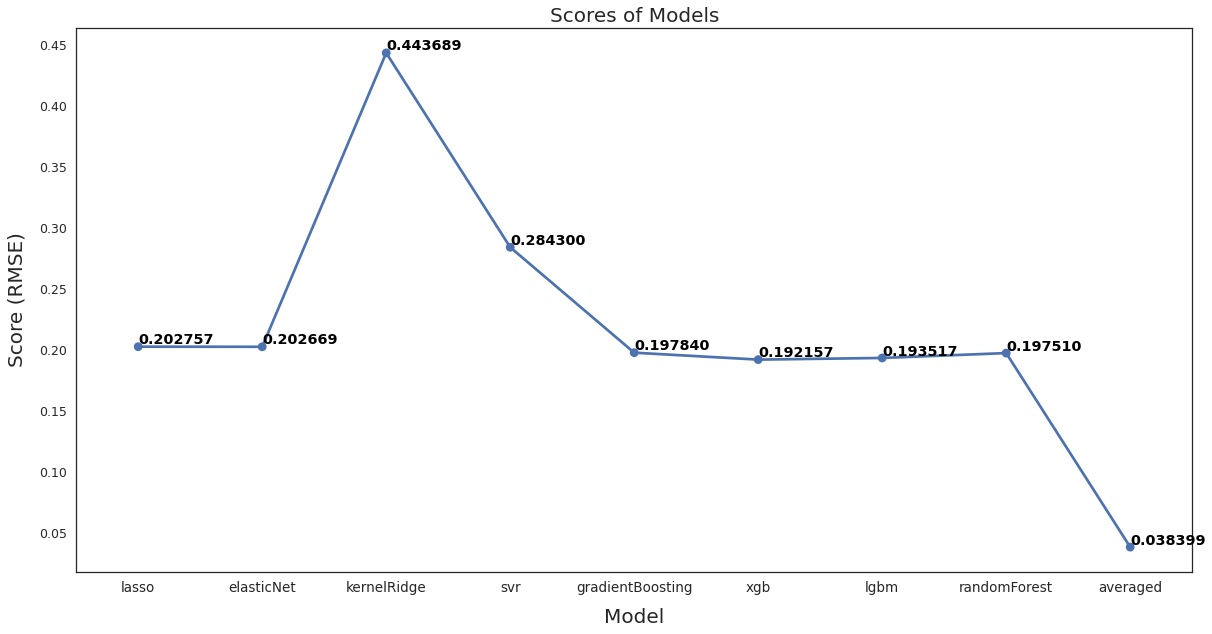

In [ ]:
sns.set_style("white")
fig = plt.figure(figsize=(20, 10))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)
plt.show()

In [ ]:
test_predict = np.expm1(ensemble(X_test))
from scipy.special import boxcox, inv_boxcox
#test_predict = inv_boxcox(ensemble(X_test),fitted_lambda)
print(test_predict[:5])

[4.13366711 2.7043006  2.67559926 3.26726282 3.37582371]


In [ ]:
my_submission = pd.DataFrame({'X': test_ID, 'Target': test_predict})
#you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

**C/c : the best models that gives us the best results are XGBoost and Ensemble learning!**